#Build a recommender system by using cosine simillarties score.


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving book (1).csv to book (1).csv


In [4]:
#Load the data set
book = pd.read_csv("book (1).csv" , encoding='latin-1')
book.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [6]:
book.rename({'Unnamed: 0':'index','User.ID':'User_ID','Book.Title':'Book_Title','Book.Rating':'Book_Rating'},
              axis= 1, inplace= True)
book.set_index('index', inplace= True)
book.head()

,User_ID,Book_Title,Book_Rating
index,,,
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6


In [7]:
book.shape

(10000, 3)

In [8]:
book.isnull().sum()

User_ID        0
Book_Title     0
Book_Rating    0
dtype: int64

In [9]:
book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User_ID      10000 non-null  int64 
 1   Book_Title   10000 non-null  object
 2   Book_Rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 312.5+ KB


In [11]:
book['Book_Rating'].describe()

count    10000.00000
mean         7.56630
std          1.82152
min          1.00000
25%          7.00000
50%          8.00000
75%          9.00000
max         10.00000
Name: Book_Rating, dtype: float64

In [13]:
book['Book_Rating'].value_counts().sort_values(ascending=False)

8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: Book_Rating, dtype: int64

In [14]:
print('Number of Unique Users are {}'.format(len(book['User_ID'].unique())))

Number of Unique Users are 2182


In [15]:
print('Number of Unique Books are {}'.format(len(book['Book_Title'].unique())))

Number of Unique Books are 9659


In [16]:
avg = book.groupby('Book_Title')['Book_Rating'].mean().sort_values(ascending=False).head(10)
avg

Book_Title
Dr Mommy (From Here To Maternity) (Silhouette Desire, 1269)                                                           10.0
The Piano Man's Daughter                                                                                              10.0
Private Screening                                                                                                     10.0
The Pilates Body: The Ultimate At-Home Guide to Strengthening, Lengthening, and Toning Your Body--Without Machines    10.0
Desert Solitaire                                                                                                      10.0
The Pillars of the Earth                                                                                              10.0
Principia Discordia                                                                                                   10.0
COWBOY                                                                                                                10.0
Desig

In [17]:
count = book.groupby('Book_Title')['Book_Rating'].count().sort_values(ascending=False).head(10)
count

Book_Title
Fahrenheit 451                                     5
Ender's Game (Ender Wiggins Saga (Paperback))      4
Stardust                                           4
Vanished                                           4
Charlie and the Chocolate Factory                  4
The Subtle Knife (His Dark Materials, Book 2)      4
The Amber Spyglass (His Dark Materials, Book 3)    4
The Golden Compass (His Dark Materials, Book 1)    3
Pet Sematary                                       3
My Side of the Mountain                            3
Name: Book_Rating, dtype: int64

In [19]:
ratings = pd.DataFrame(book.groupby('Book_Title')['Book_Rating'].mean())
ratings.head()

,Book_Rating
Book_Title,
"Jason, Madison &amp",8.0
Other Stories;Merril;1985;McClelland &amp,6.0
Repairing PC Drives &amp,4.0
'48,7.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0


In [21]:
ratings['No_of_Ratings'] = pd.DataFrame(book.groupby('Book_Title')['Book_Rating'].count())
ratings.head()

,Book_Rating,No_of_Ratings
Book_Title,,
"Jason, Madison &amp",8.0,1
Other Stories;Merril;1985;McClelland &amp,6.0,1
Repairing PC Drives &amp,4.0,1
'48,7.0,1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0,1


###Data Visualization

In [25]:
from collections import defaultdict

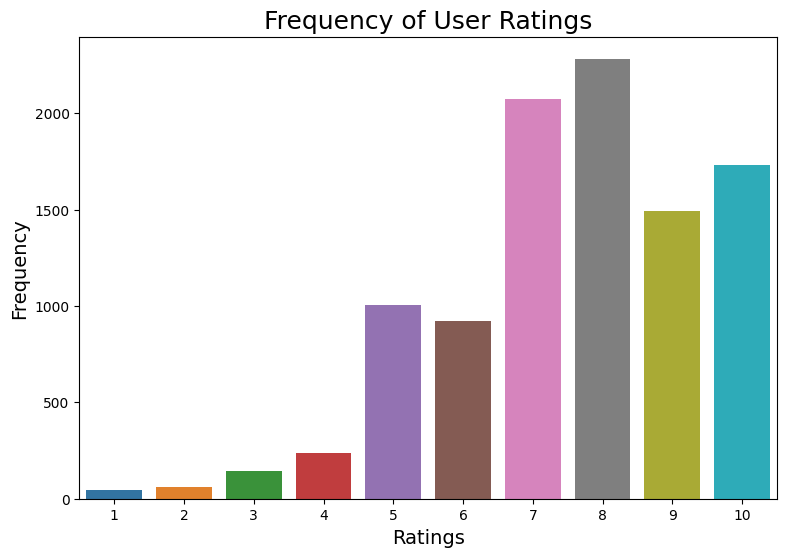

In [32]:
plt.figure(figsize=(9,6))
sns.countplot(x = book.Book_Rating)
plt.title("Frequency of User Ratings", fontsize= 18)
plt.xlabel("Ratings", fontsize= 14)
plt.ylabel("Frequency", fontsize= 14)
plt.show()

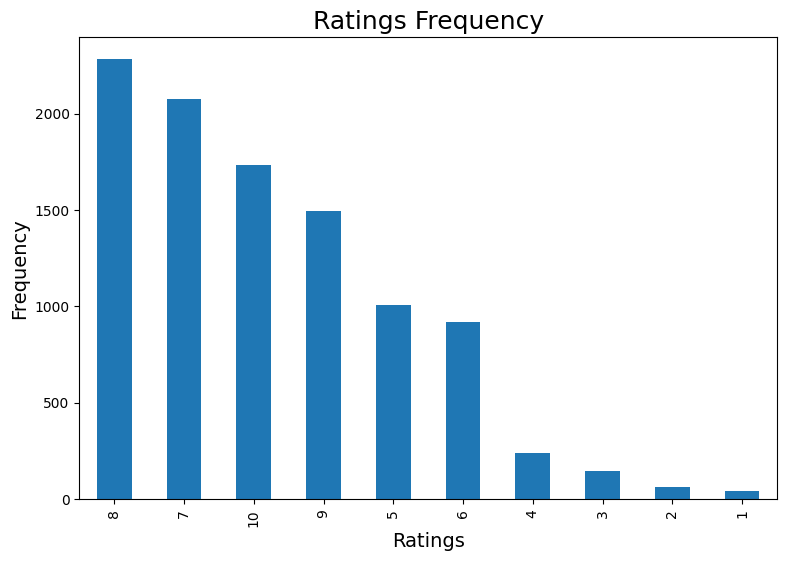

In [28]:
plt.figure(figsize=(9,6))
book['Book_Rating'].value_counts().plot(kind='bar')
plt.title('Ratings Frequency', fontsize = 18)
plt.xlabel("Ratings", fontsize= 14)
plt.ylabel("Frequency", fontsize= 14);

Most Frequent Ratings by Users are: 8, 7 and 10

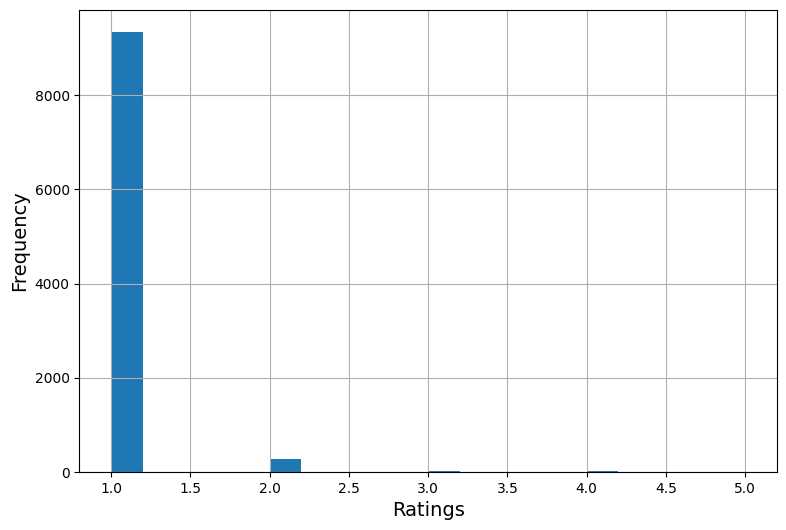

In [33]:
plt.figure(figsize=(9,6))
ratings['No_of_Ratings'].hist(bins=20)
plt.xlabel("Ratings", fontsize= 14)
plt.ylabel("Frequency", fontsize= 14);

Maximum Number of Books are Rated only Once

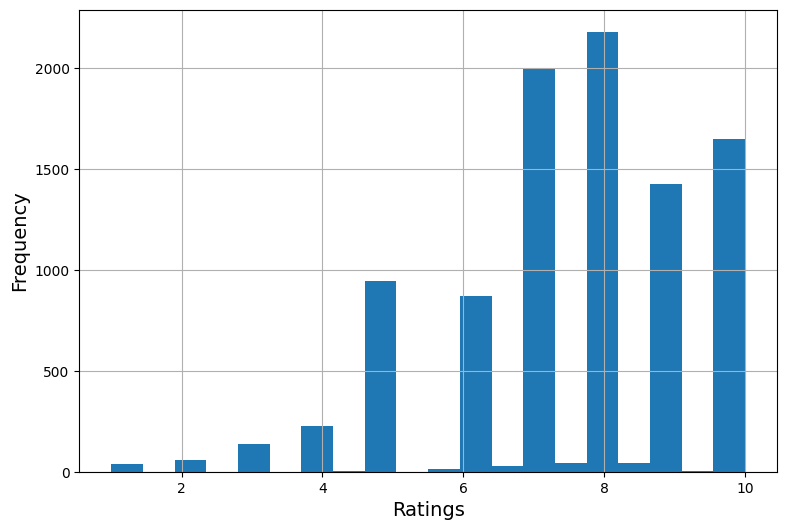

In [34]:
plt.figure(figsize=(9,6))
ratings['Book_Rating'].hist(bins=20)
plt.xlabel("Ratings", fontsize= 14)
plt.ylabel("Frequency", fontsize= 14);

In [35]:
top_books = book['Book_Title'].value_counts().head(10)
top_books.index

Index(['Fahrenheit 451', 'Charlie and the Chocolate Factory',
       'The Subtle Knife (His Dark Materials, Book 2)', 'Vanished',
       'Ender's Game (Ender Wiggins Saga (Paperback))', 'Stardust',
       'The Amber Spyglass (His Dark Materials, Book 3)', 'Life Is Elsewhere',
       'The Golden Compass (His Dark Materials, Book 1)',
       'The Hitchhiker's Guide to the Galaxy'],
      dtype='object')

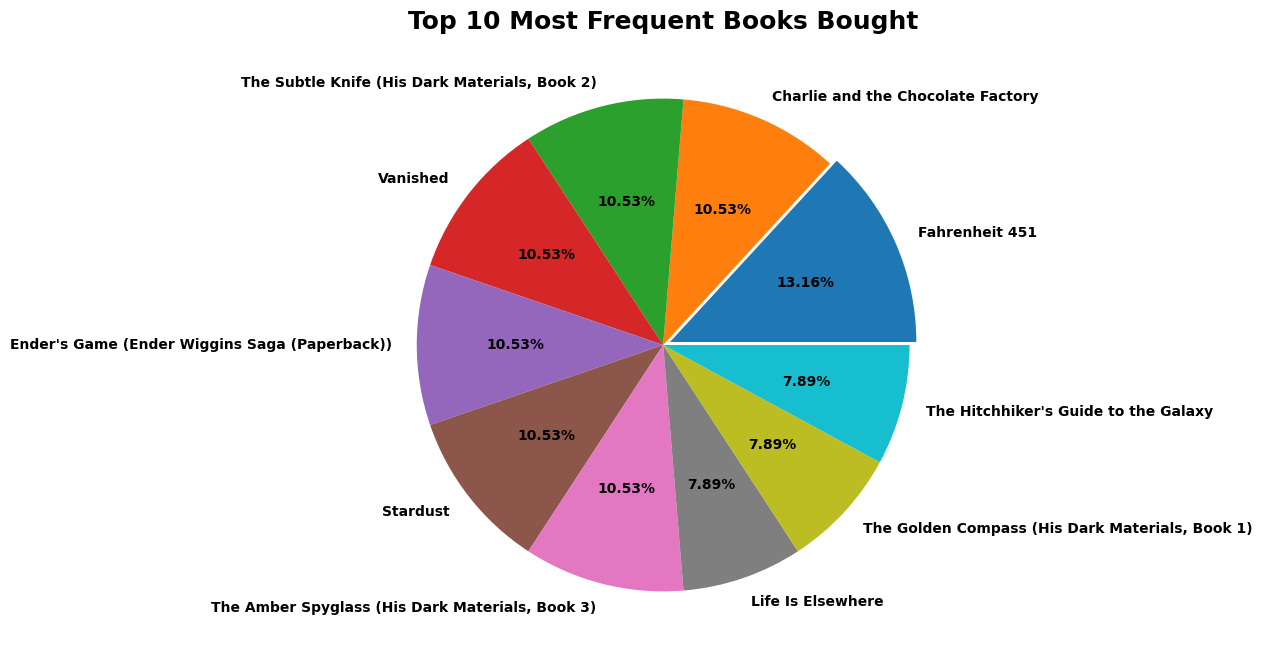

In [36]:
plt.figure(figsize = (8,8))
plt.pie(top_books, labels=top_books.index,
        explode = [0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
        autopct= '%.2f%%', textprops = {'size' : 10, 'fontweight': 'bold'})

plt.title("Top 10 Most Frequent Books Bought", fontsize = 18, fontweight = 'bold');

##Collaborative Book Recommendation System


###Creating Pivot Table

In [37]:
user_books = book.pivot_table(index= 'User_ID', columns= 'Book_Title', values= 'Book_Rating').fillna(0)
user_books

Book_Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
User_ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [38]:
#Calculating Cosine Similarity Between Users

ratings.sort_values('No_of_Ratings', ascending= False).head(10)

,Book_Rating,No_of_Ratings
Book_Title,,
Fahrenheit 451,7.000000,5
Ender's Game (Ender Wiggins Saga (Paperback)),6.250000,4
Stardust,8.500000,4
Vanished,6.500000,4
Charlie and the Chocolate Factory,6.500000,4
"The Subtle Knife (His Dark Materials, Book 2)",8.750000,4
"The Amber Spyglass (His Dark Materials, Book 3)",8.250000,4
"The Golden Compass (His Dark Materials, Book 1)",8.333333,3
Pet Sematary,7.666667,3


In [39]:
stardust_user_ratings = user_books['Stardust']
fahrenheit_user_rating = user_books['Fahrenheit 451']
fahrenheit_user_rating.head()


User_ID
8     0.0
9     0.0
10    0.0
12    0.0
14    0.0
Name: Fahrenheit 451, dtype: float64

In [41]:
similar_to_fahrenheit = user_books.corrwith(fahrenheit_user_rating)
similar_to_stardust = user_books.corrwith(stardust_user_ratings)

In [42]:
corr_fahrenheit = pd.DataFrame(similar_to_fahrenheit, columns= ['Correlation'])
corr_fahrenheit.dropna(inplace= True)
corr_fahrenheit.head()

,Correlation
Book_Title,
"Jason, Madison &amp",-0.000958
Other Stories;Merril;1985;McClelland &amp,-0.000958
Repairing PC Drives &amp,-0.000958
'48,-0.000958
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,-0.000958


In [43]:
corr_fahrenheit.sort_values('Correlation', ascending= False).head(10)

,Correlation
Book_Title,
Fahrenheit 451,1.000000
The Day I Swapped My Dad for 2 Goldfish,0.596326
A la vora del pou (El BalancÃ­),0.596326
"Father Of Two (The Daddy School) (Harlequin Superromance, No 771)",0.596326
Contes de fÃ?Â©es Ã?Â l'usage des moyennes personnes,0.596326
Silent Witness,0.596326
The Ambassador's Women,0.596326
Bloodcurdling Tales of Horror,0.596326
"Julia (Circle Of Friends) (Harlequin Superromance, 813)",0.596326


In [44]:
corr_fahrenheit = corr_fahrenheit.join(ratings['Book_Rating'])
corr_fahrenheit.head()

,Correlation,Book_Rating
Book_Title,,
"Jason, Madison &amp",-0.000958,8.0
Other Stories;Merril;1985;McClelland &amp,-0.000958,6.0
Repairing PC Drives &amp,-0.000958,4.0
'48,-0.000958,7.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,-0.000958,8.0


Recommending Similar Books Using Correlation Based on Ratings

In [45]:
corr_fahrenheit[corr_fahrenheit['Book_Rating']>5].sort_values('Correlation', ascending= False).head()

,Correlation,Book_Rating
Book_Title,,
Fahrenheit 451,1.000000,7.0
The Day I Swapped My Dad for 2 Goldfish,0.596326,9.0
Silent Witness,0.596326,7.0
The Onion Girl,0.596326,7.0
Mr. Punch,0.596326,7.0


In [46]:
corr_stardust = pd.DataFrame(similar_to_stardust, columns= ['Correlation'])
corr_stardust.dropna(inplace= True)
corr_stardust = corr_stardust.join(ratings['No_of_Ratings'])
corr_stardust[corr_stardust['No_of_Ratings']>4].sort_values('Correlation', ascending= False).head()


,Correlation,No_of_Ratings
Book_Title,,
Fahrenheit 451,-0.001908,5


Collaborative Recommender System Using Cosine Similarity

In [47]:
user_books.head()

Book_Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
User_ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating Cosine Similarity Between Users

In [48]:
user_sim = 1 - pairwise_distances(user_books.values, metric= 'cosine')
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [49]:
#Store the results in DataFrame

user_sim_df = pd.DataFrame(user_sim)
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [50]:
user_sim_df.iloc[:5,:5]

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0


In [51]:
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:5,0:5]

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [52]:
#Set the index and column name to User IDs

user_sim_df.index = list(user_books.index)
user_sim_df.columns = list(user_books.index)
user_sim_df

,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
user_id_eight = user_sim_df.sort_values([9], ascending= False).head(100)
user_id_eight[9]

8         0.0
161755    0.0
161744    0.0
161749    0.0
161750    0.0
         ... 
161441    0.0
161436    0.0
161434    0.0
161431    0.0
161423    0.0
Name: 9, Length: 100, dtype: float64

In [55]:
book[(book['User_ID']==8) | (book['User_ID']==14)]

,User_ID,Book_Title,Book_Rating
index,,,
2400,8,Ancient Celtic Romances,5
2401,8,The Western way: A practical guide to the West...,5
2402,8,Wings,5
2403,8,Truckers,5
2404,8,Keepers of the Earth Teachers Guide,6
2405,8,The Celts Activity Book,6
2406,8,The Art Of Celtia,7
2410,14,COPS,5
2411,14,A Cold Heart: An Alex Delaware Novel,5


In [56]:
#Most Similar Users
user_sim_df.idxmax(axis=1)

8              8
9              8
10             8
12             8
14             8
           ...  
278846         8
278849         8
278851    278202
278852         8
278854         8
Length: 2182, dtype: int64

In [57]:
book[(book['User_ID']==8) | (book['User_ID']==14)]

,User_ID,Book_Title,Book_Rating
index,,,
2400,8,Ancient Celtic Romances,5
2401,8,The Western way: A practical guide to the West...,5
2402,8,Wings,5
2403,8,Truckers,5
2404,8,Keepers of the Earth Teachers Guide,6
2405,8,The Celts Activity Book,6
2406,8,The Art Of Celtia,7
2410,14,COPS,5
2411,14,A Cold Heart: An Alex Delaware Novel,5


In [58]:
#Recommendation Based on Cosine Similarity
def give_recommendation(customer_id):
    tem = list(user_sim_df.sort_values([customer_id], ascending= False).head().index)
    books_list = []

    for i in tem:
        books_list = books_list + list(book[book['User_ID']==i]['Book_Title'])
    return set(books_list)-set(book[book['User_ID']==customer_id]['Book_Title'])


In [59]:
give_recommendation(14)

{'After All These Years',
 'Ancient Celtic Romances',
 "Bad Jobs: My Last Shift at Albert Wong's Pagoda and Other Ugly Tales of the Workplace",
 'Belladonna: A Novel of Revenge',
 'Black Boy (American Hunger : a Record of Childhood and Youth)',
 'CHINA WHITE',
 'Chicken Soup from the Soul of Hawaii: Stories of Aloha to Create Paradise Wherever You Are',
 'Critical Judgment',
 'Daydreams',
 'End of the Road',
 'FOR COLORED GIRLS WHO HAVE CONSIDERED SUICIDE WHEN THE RAINBOW IS ENUF',
 "Flying Hawaii : A Pilot's Guide to the Islands",
 "I'm the One That I Want",
 'Jaguars Ripped My Flesh: Adventure Is a Risky Business (Bantam New Fiction Series)',
 'Jennifer, Hecate, MacBeth, William McKinley and Me, Elizabeth',
 'Katwalk (Kat Colorado Mysteries)',
 'Keepers of the Earth Teachers Guide',
 'Modern Women',
 'Mr. Bridge',
 'Mrs. Mike',
 'Night Train to Memphis',
 'On a Street Called Easy, in a Cottage Called Joye',
 "Pooh's Workout Book",
 'Random Family: Love, Drugs, Trouble, and Coming of 

In [60]:
give_recommendation(8)

{'After All These Years',
 "Bad Jobs: My Last Shift at Albert Wong's Pagoda and Other Ugly Tales of the Workplace",
 'Belladonna: A Novel of Revenge',
 'Black Boy (American Hunger : a Record of Childhood and Youth)',
 'CHINA WHITE',
 'Chicken Soup from the Soul of Hawaii: Stories of Aloha to Create Paradise Wherever You Are',
 'Critical Judgment',
 'Daydreams',
 'End of the Road',
 'FOR COLORED GIRLS WHO HAVE CONSIDERED SUICIDE WHEN THE RAINBOW IS ENUF',
 "Flying Hawaii : A Pilot's Guide to the Islands",
 "I'm the One That I Want",
 'Jaguars Ripped My Flesh: Adventure Is a Risky Business (Bantam New Fiction Series)',
 'Jennifer, Hecate, MacBeth, William McKinley and Me, Elizabeth',
 'Katwalk (Kat Colorado Mysteries)',
 'Modern Women',
 'Mr. Bridge',
 'Mrs. Mike',
 'Night Train to Memphis',
 'On a Street Called Easy, in a Cottage Called Joye',
 "Pooh's Workout Book",
 'Random Family: Love, Drugs, Trouble, and Coming of Age in the Bronx',
 'Send in the Stunt Mom: The Second Collection of